In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms # transforms가  vision에서옴 ---> 이미지랑 관련된거임

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import numpy as np

In [9]:
# 1.데이터 전처리 파이프라인 정의
# 파이프라인 정의 : transforms.Compose

# 정규화 : MinMax(0~1사이 값으로 바꾼다.문제점:크기만 줄고 중심은 같아지지 X)
# --> 결론:중심으로 보내자 , MinMax 하면 안됨

# 전처리 : 데이터 -> 텐서변환 -> 졍규화 -> output
# 어떤 변환을 할지 Compose 에 등록!!하겠다는 것, 진짜 변환 X
# Compose: pipline을 정의하는것

transform = transforms.Compose([
    # 1.Float 형으로 변환 : 0.0~ 1.0사이값으로 변환(안에 MinMax들어 있음)
    # 이미지나 ndarray를 tensor로 변환하는 작업 
    # 원래이미지는 (H,W,C) --> (C,H,W) , 이렇게 바꿔줌
    transforms.ToTensor(),

    # 2.Normalize() : 평균0, 분산 1  ---> input data(0.0~1.0) - mean / std
    # 평균 : 0.5 , 분산 :0.5 로 줘서 바꿔보는 작업 하겠다.
    # 모든데이터가 -1~1사이로 바뀜
    # 딥러닝에서는 0을 기준으로 대칭인 데이터가 가장 빠르고 안전하게 학습함!!!!!!!! (batch normalization가 하는 일)

    # data => 0~255 =? 0.0~1.0 => -1.0 ~ 1.0:
    # 데이터가 0을 중심으로 대칭인 분포(Zero-centered)을 가진다
    # 딥러닝 모델이 더 빠르고 안정적인 학습 함
    transforms.Normalize((0.5,),(0.5,))
]) # () 안에는 리스트 들어가야함


In [ ]:
# 2.연습용 훈련 데이터셋(DataSet)을 다운로드
# 실제 데이터 --> Datset -> DataLoader
# 2.1 훈련 데이터셋 다운로드
training_set = torchvision.datasets.FashionMNIST(
    root='./data', # 데이터가 저장할 폴더 위치 지정
                    # 만약 에러나면 여기 폴더 지우고다시행하
    train = True,   # True : 훈련용 데이터(6만장)를 다운로드 지정,False:평가용 데이터(1만장) 다운로드
    download = True, # root(./data) 경로에 데이터가 없으면 다운로드
    transform=transform # 다운로드 하면서 transform 해란
                        # 위에서 정의한 전처리 과정(ToTensor,Normalize)를 데이터를 불러올때 마다 적용
                        # 데이터 셋 따로 만들때 적용하면 됨

) # 연습용 O ,실무용 X

# 2.2 검증 데이터셋 다운로드 (다시말하지만 연습용이다.)
validation_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform # 불러오면서 전처리 하면서 저장함 그래서 Dataset이 되었다.
)

# .gz : 숫자로된 파일로 저장됨

100%|██████████| 26421880/26421880 [00:52<00:00, 504967.81it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 105258.36it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1334752.46it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9656653.40it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [23]:
# 3.DataLoader 생성
# 3.1 학습용
training_loader = DataLoader(
    training_set,  # DataSet가 들어가야함
    batch_size = 64, #64장 이미지를 묶어서 모델(신경망) 전달
                     # batch size : 한번에 들어가는 데이터 양
    shuffle=True,    # 훈련데이터는 섞는게 필요하다
    num_workers=2,   # CPU 코어 갯수 지정, 늘리면 읽는 속도 빨라짐 너무높이면 cpu열받을 수 있다.abs 
                    # 뼝렬 처리 가능

)

#3.2
# 3.2감정용
validation_loader  = DataLoader(
    validation_set,
    batch_size=64,
    shuffle=False,
    num_workers = 2 
)


In [29]:
# 4. 데이터로더에서 한 배치를 가져와보기
# iter(training_loader) 반복가능하게 만든다
# next(iter(training_loader)) 한 배치를 가져온 것
images, labels = next(iter(training_loader))
print(f'Shape of a batch of images : {images.shape}')
# Shape of a batch of images : torch.Size([64, 1, 28, 28])
# 28X28 크기의 흑백 이미지 64장이 신경망에 한번에 입력이 된다


print(f'Shape of a batch of labels : {labels.shape}')
print(f'Traning set has {(len(training_set))} instances.')
print(f'Validation set has {(len(validation_set))} instances.')

Shape of a batch of images : torch.Size([64, 1, 28, 28])
Shape of a batch of labels : torch.Size([64])
Traning set has 60000 instances.
Validation set has 10000 instances.


In [ ]:
print(f'Data type of images:{images.dtype}') # 결과 tensor (원래이미지는 ndarray --> 텐서변환)
print(f'Min pixel value: {images.min():.2f},Max pixel value:{images.max():.2f}') # 결과 : -1~1사이/ 전처리 다 됬다.

Data type of images:torch.float32
Min pixel value: -1.00,Max pixel value:1.00


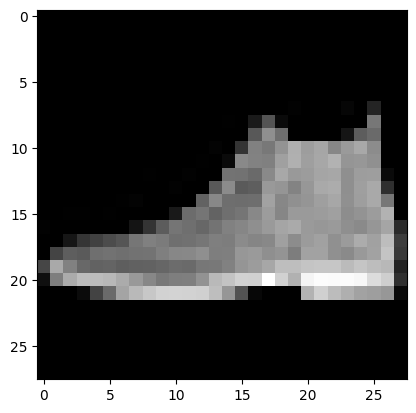

tensor(9)


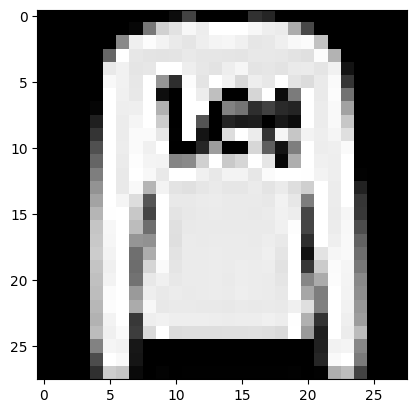

tensor(2)


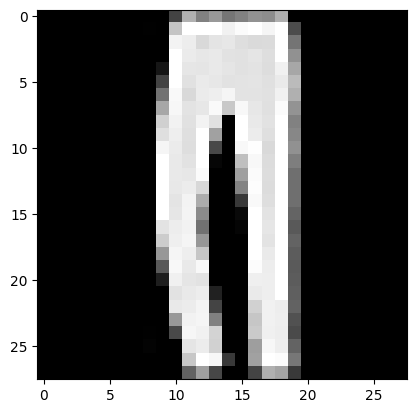

tensor(1)


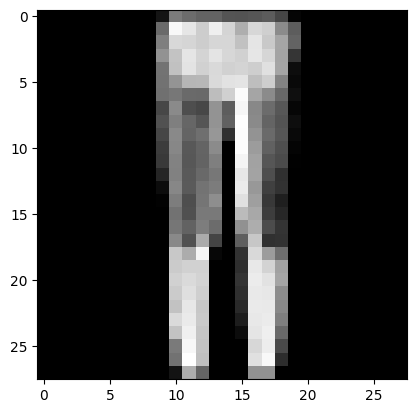

tensor(1)


In [ ]:
# 언제사용? 데이터를 잘 가져왔는지 확인해야함
# 이미지 시각화 함수
def imshow(img):
    img = img / 2+0.5 # 정규화 해체 : [-1,1] -> [0,1]로 되돌림 즉, 사이값으로 바뀜 -> X 255 -> [0,255]
    npimg = img.numpy()  # 텐서를 넘파이로 바꿔주는 함수
    plt.imshow(np.transpose(npimg,(1,2,0))) # 텐서 (C,H,W) -> 넘파이 (H,W,C)
    plt.show()

# 시각화[이미지 4장 꺼내기 from DataLoader 에서]
# 1. batch 한개 가져오고 거기서 4장 꺼내야함
# 로드에서 한 배치 추출
# images,labels = next(iter(training_loader)) # 64장
images,labels = next(iter(validation_loader)) # validation 하며 같은이미지 나옴(셔플 안함)
# imshow(images[0]) # 칼라
# imshow(torchvision.utils.make_grid(images[0])) # 흑백

for idx in range(4):
    imshow(torchvision.utils.make_grid(images[idx])) # 흑백
    print(labels[idx])